Using Python, create a line chart with both the daily and 7-day moving average for the close price for Tesla stock. You can download a CSV with the current prices [here](https://finance.yahoo.com/quote/tsla/history/).

In [1]:
#Importing packages.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

%matplotlib inline

In [2]:
#retrieved and named the dataframe
df = pd.read_csv('./TSLA.csv')

In [3]:
#using to see all of the columns when I retrieve the head and describe
pd.set_option('display.max_columns', 999)

In [4]:
#examine the dataframe
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-05,144.753998,149.149994,143.613998,144.908005,144.908005,54263500
1,2020-03-06,138.000000,141.399994,136.854004,140.695999,140.695999,63314500
2,2020-03-09,121.078003,132.600006,121.000000,121.599998,121.599998,85368500
3,2020-03-10,131.886002,133.600006,121.599998,129.065994,129.065994,77972000
4,2020-03-11,128.039993,130.716003,122.599998,126.846001,126.846001,66612500


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2021-03-01,690.109985,719.000000,685.049988,718.429993,718.429993,27009700
249,2021-03-02,718.280029,721.109985,685.000000,686.440002,686.440002,23617600
250,2021-03-03,687.989990,700.700012,651.710022,653.200012,653.200012,29957200
251,2021-03-04,655.799988,873.940002,600.000000,621.440002,621.440002,65448500
252,2021-03-05,626.059998,627.769897,539.489990,598.639893,598.639893,82631962


In [6]:
#calculating the 7 day moving average using the closing price
df['MovAvg'] = df['Close'].rolling(window=7).mean()

In [7]:
#examine dataframe again
df.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume,MovAvg
0,2020-03-05,144.753998,149.149994,143.613998,144.908005,144.908005,54263500,NaN
1,2020-03-06,138.000000,141.399994,136.854004,140.695999,140.695999,63314500,NaN
2,2020-03-09,121.078003,132.600006,121.000000,121.599998,121.599998,85368500,NaN
3,2020-03-10,131.886002,133.600006,121.599998,129.065994,129.065994,77972000,NaN
4,2020-03-11,128.039993,130.716003,122.599998,126.846001,126.846001,66612500,NaN
5,2020-03-12,116.178001,118.900002,109.250000,112.110001,112.110001,94545500,NaN
6,2020-03-13,119.000000,121.514000,100.400002,109.323997,109.323997,113201500,126.364285


In [8]:
#drop the first 7 rows that do not have a moving average
df = df.dropna()
df.reset_index(drop=True)

,Date,Open,High,Low,Close,Adj Close,Volume,MovAvg
0,2020-03-13,119.000000,121.514000,100.400002,109.323997,109.323997,113201500,126.364285
1,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500,118.379427
2,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000,110.571427
3,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000,103.520571
4,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500,97.300858
...,...,...,...,...,...,...,...,...
242,2021-03-01,690.109985,719.000000,685.049988,718.429993,718.429993,27009700,716.115714
243,2021-03-02,718.280029,721.109985,685.000000,686.440002,686.440002,23617600,702.564288
244,2021-03-03,687.989990,700.700012,651.710022,653.200012,653.200012,29957200,693.807146
245,2021-03-04,655.799988,873.940002,600.000000,621.440002,621.440002,65448500,682.750000


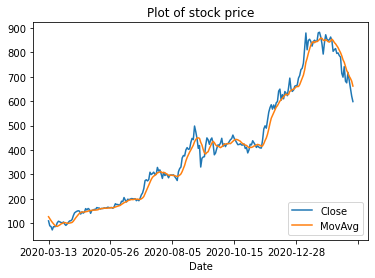

In [9]:
#create chart
chart = df.plot(x='Date', y=['Close','MovAvg'], kind='line',\
                     legend=False, title='Plot of stock price')
plt.legend(loc='lower right')
plt.show()